In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import tree
import pydot

In [2]:
data=pd.read_csv('Credit_Manager_Take_Home_Data_Clean.csv')
data

,SignalDateTime,isApplication,isApproval,isAcceptance,isCompletion,FICOScore,RequestedAmount,InquiryNum,BaseRatingBin,channelBin
0,2020-03-01 00:08:00,1,1,0,0,714.0,11000.0,0.0,6.0,1
1,2020-03-01 00:19:00,1,0,0,0,665.0,16000.0,0.0,7.0,1
2,2020-03-01 00:19:00,1,0,0,0,553.0,3000.0,1.0,8.0,8
3,2020-03-01 00:31:00,1,1,0,0,738.0,8000.0,0.0,3.0,1
4,2020-03-01 00:42:00,1,1,0,0,710.0,13500.0,-4.0,4.0,1
...,...,...,...,...,...,...,...,...,...,...
79183,2020-05-30 23:23:00,1,0,0,0,NaN,NaN,NaN,NaN,1
79184,2020-05-30 23:44:00,1,0,0,0,696.0,3000.0,8.0,8.0,8
79185,2020-05-30 23:45:00,1,0,0,0,701.0,28000.0,-4.0,8.0,1
79186,2020-05-30 23:47:00,1,1,0,0,685.0,13200.0,0.0,4.0,1


# Part 1: Exploratory Data Analysis

Check the correlations between isApproval and numeric variables like FICOScore, RequestedAmount and InquiryNum

In [3]:
data[['isApproval','FICOScore','RequestedAmount','InquiryNum']][data['InquiryNum']>=0].corr()

,isApproval,FICOScore,RequestedAmount,InquiryNum
isApproval,1.000000,0.557622,0.140049,-0.298037
FICOScore,0.557622,1.000000,0.262304,-0.232416
RequestedAmount,0.140049,0.262304,1.000000,-0.097706
InquiryNum,-0.298037,-0.232416,-0.097706,1.000000


We can see FICO is the most related to Approval, while InquiryNum is negatively related to Approval and other numeric variables

Run distributions for Approval 0 and 1, respectively

<AxesSubplot:ylabel='Frequency'>

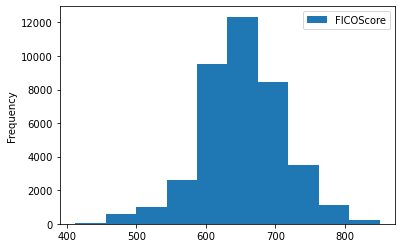

In [4]:
data[['FICOScore']][data['isApproval']==0].plot.hist()

<AxesSubplot:ylabel='Frequency'>

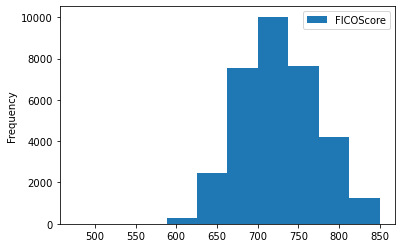

In [5]:
data[['FICOScore']][data['isApproval']==1].plot.hist()

<AxesSubplot:ylabel='Frequency'>

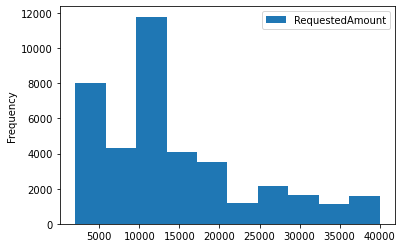

In [6]:
data[['RequestedAmount']][data['isApproval']==0].plot.hist()

<AxesSubplot:ylabel='Frequency'>

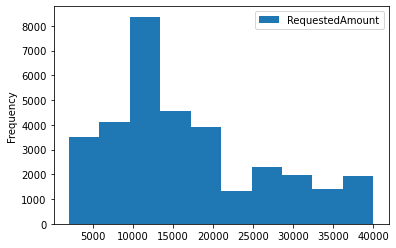

In [7]:
data[['RequestedAmount']][data['isApproval']==1].plot.hist()

<AxesSubplot:ylabel='Frequency'>

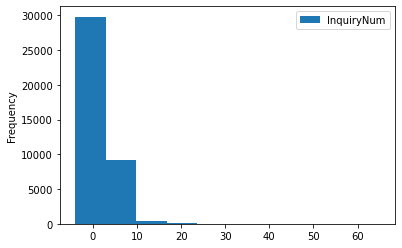

In [8]:
data[['InquiryNum']][data['isApproval']==0].plot.hist()

<AxesSubplot:ylabel='Frequency'>

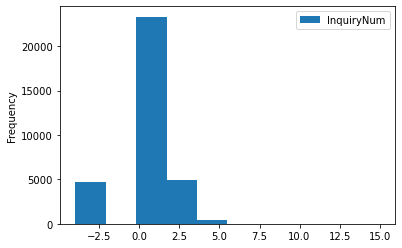

In [9]:
data[['InquiryNum']][data['isApproval']==1].plot.hist()

<AxesSubplot:ylabel='Frequency'>

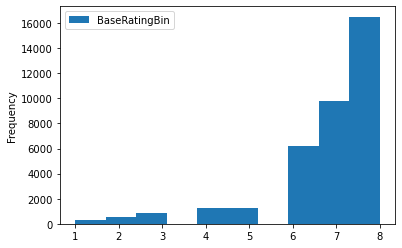

In [10]:
data[['BaseRatingBin']][data['isApproval']==0].plot.hist()

<AxesSubplot:ylabel='Frequency'>

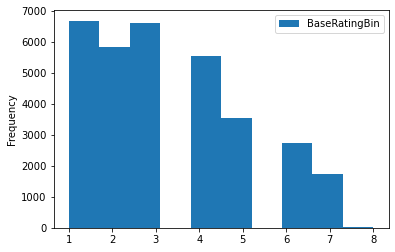

In [11]:
data[['BaseRatingBin']][data['isApproval']==1].plot.hist()

<AxesSubplot:ylabel='Frequency'>

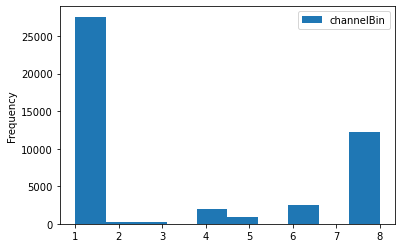

In [12]:
data[['channelBin']][data['isApproval']==0].plot.hist()

<AxesSubplot:ylabel='Frequency'>

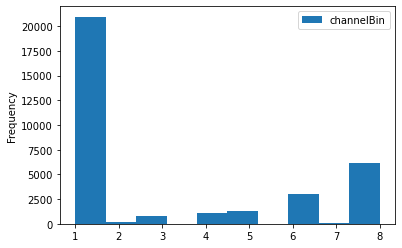

In [13]:
data[['channelBin']][data['isApproval']==1].plot.hist()

# Part 2  Rule-Based Strategy

We can get a basic idea of what criteria and cut-off we can use in our rules based the exploratory data analysis

First we need to split the dataset into training and testing groups

In [14]:
data['Aprv_Decision']=np.where(data['FICOScore']>=700,1,0)
data['Aprv_Decision']=np.where(data['InquiryNum']<=2,data['Aprv_Decision'],0)
data['Aprv_Decision']=np.where(data['BaseRatingBin']<=5,data['Aprv_Decision'],0)

In [15]:
data['Aprv_Decision'].value_counts()

0    55652
1    23536
Name: Aprv_Decision, dtype: int64

In [16]:
data['isApproval'].value_counts()

0    45687
1    33501
Name: isApproval, dtype: int64

In [17]:
metrics.confusion_matrix(data['isApproval'], data['Aprv_Decision'])

array([[43168,  2519],
       [12484, 21017]], dtype=int64)

In [18]:
tn, fp, fn, tp = metrics.confusion_matrix(data['isApproval'], data['Aprv_Decision']).ravel()
(tn, fp, fn, tp)

(43168, 2519, 12484, 21017)

In [19]:
accuracy=(tp+tn)/len(data)
accuracy

0.810539475678133

Accuracy is 81%, which means the approval/decline prediction is 81% right

In [20]:
precision=tp/(tp+fp)
precision

0.8929724677090415

Precision is 89%, which means if it is predicted to be approved, then this application is 89% likely to be approved

In [21]:
recall=tp/(tp+fn)
recall

0.6273544073311245

Recall is 63%, which means it can cover 63% of total approval

Overall, it is a good rule and it covers a half of approval. But only 1 rule is not enough, that is why we need a rule-set.

Let's try to write more rules to cover more based on this one. In this mini-case, I just update this existing rule's cut-off, but in real work we still need to write new rules.

Take a look at the population not approved by this rule. 

<AxesSubplot:ylabel='Frequency'>

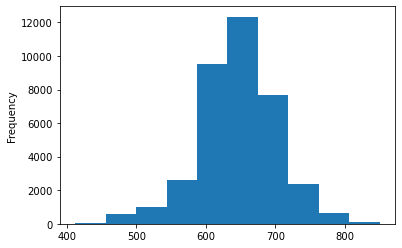

In [22]:
data[data['Aprv_Decision']==0]['FICOScore'][data['isApproval']==0].plot.hist()

<AxesSubplot:ylabel='Frequency'>

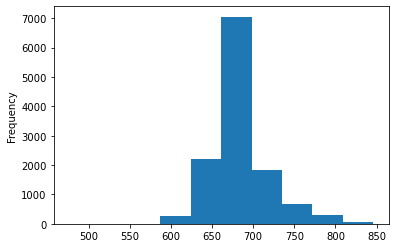

In [23]:
data[data['Aprv_Decision']==0]['FICOScore'][data['isApproval']==1].plot.hist()

<AxesSubplot:ylabel='Frequency'>

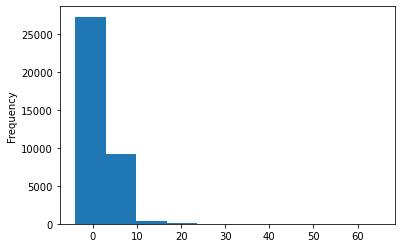

In [24]:
data[data['Aprv_Decision']==0]['InquiryNum'][data['isApproval']==0].plot.hist()

<AxesSubplot:ylabel='Frequency'>

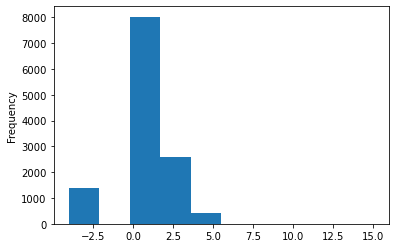

In [25]:
data[data['Aprv_Decision']==0]['InquiryNum'][data['isApproval']==1].plot.hist()

<AxesSubplot:ylabel='Frequency'>

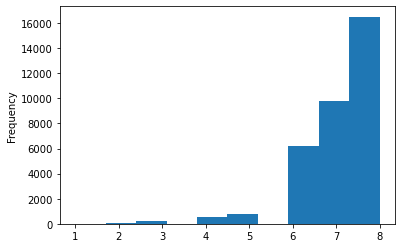

In [26]:
data[data['Aprv_Decision']==0]['BaseRatingBin'][data['isApproval']==0].plot.hist()

<AxesSubplot:ylabel='Frequency'>

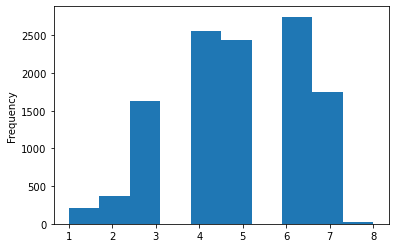

In [27]:
data[data['Aprv_Decision']==0]['BaseRatingBin'][data['isApproval']==1].plot.hist()

In [28]:
data['Aprv_Decision']=np.where(data['FICOScore']>=670,1,0)
data['Aprv_Decision']=np.where(data['InquiryNum']<=2,data['Aprv_Decision'],0)
data['Aprv_Decision']=np.where(data['BaseRatingBin']<=6,data['Aprv_Decision'],0)

In [29]:
data['Aprv_Decision'].value_counts()

0    47898
1    31290
Name: Aprv_Decision, dtype: int64

In [30]:
data['isApproval'].value_counts()

0    45687
1    33501
Name: isApproval, dtype: int64

In [31]:
metrics.confusion_matrix(data['isApproval'], data['Aprv_Decision'])

array([[41337,  4350],
       [ 6561, 26940]], dtype=int64)

In [32]:
tn, fp, fn, tp = metrics.confusion_matrix(data['isApproval'], data['Aprv_Decision']).ravel()
(tn, fp, fn, tp)

(41337, 4350, 6561, 26940)

In [33]:
accuracy=(tp+tn)/len(data)
accuracy

0.8622139718139112

In [34]:
precision=tp/(tp+fp)
precision

0.8609779482262704

In [35]:
recall=tp/(tp+fn)
recall

0.8041550998477658

We got much more approvals while the accuracy and precision are still good.There is still much space to build more rules to increase approval coverage as well as decrease the false approval if there is more time and more data.

# Part 3 Decision Tree Model

It is better to use CART or GBM, which are more powerful to deal with category variables and missing values, however my personal laptop does not support the tensorflow_decision_forests, so I just use a simple decision tree for this time.

In [36]:
df=data.dropna()
df

,SignalDateTime,isApplication,isApproval,isAcceptance,isCompletion,FICOScore,RequestedAmount,InquiryNum,BaseRatingBin,channelBin,Aprv_Decision
0,2020-03-01 00:08:00,1,1,0,0,714.0,11000.0,0.0,6.0,1,1
1,2020-03-01 00:19:00,1,0,0,0,665.0,16000.0,0.0,7.0,1,0
2,2020-03-01 00:19:00,1,0,0,0,553.0,3000.0,1.0,8.0,8,0
3,2020-03-01 00:31:00,1,1,0,0,738.0,8000.0,0.0,3.0,1,1
4,2020-03-01 00:42:00,1,1,0,0,710.0,13500.0,-4.0,4.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
79182,2020-05-30 23:23:00,1,1,0,0,731.0,36000.0,1.0,2.0,1,1
79184,2020-05-30 23:44:00,1,0,0,0,696.0,3000.0,8.0,8.0,8,0
79185,2020-05-30 23:45:00,1,0,0,0,701.0,28000.0,-4.0,8.0,1,0
79186,2020-05-30 23:47:00,1,1,0,0,685.0,13200.0,0.0,4.0,1,1


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69481 entries, 0 to 79187
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SignalDateTime   69481 non-null  object 
 1   isApplication    69481 non-null  int64  
 2   isApproval       69481 non-null  int64  
 3   isAcceptance     69481 non-null  int64  
 4   isCompletion     69481 non-null  int64  
 5   FICOScore        69481 non-null  float64
 6   RequestedAmount  69481 non-null  float64
 7   InquiryNum       69481 non-null  float64
 8   BaseRatingBin    69481 non-null  float64
 9   channelBin       69481 non-null  int64  
 10  Aprv_Decision    69481 non-null  int32  
dtypes: float64(4), int32(1), int64(5), object(1)
memory usage: 6.1+ MB


Only use 'FICOScore','RequestedAmount','InquiryNum','BaseRatingBin','channelBin' as predictors

In [38]:
x, y = df[['FICOScore','RequestedAmount','InquiryNum','BaseRatingBin','channelBin']],df['isApproval']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=33)

In [39]:
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_leaf=5)
clf = clf.fit(x_train, y_train)

[Text(184.30096153846154, 199.32, 'X[3] <= 5.5\nentropy = 0.998\nsamples = 34740\nvalue = [18304, 16436]'),
 Text(101.40576923076924, 163.07999999999998, 'X[3] <= 3.5\nentropy = 0.555\nsamples = 16271\nvalue = [2099, 14172]'),
 Text(51.50769230769231, 126.83999999999999, 'X[2] <= 0.5\nentropy = 0.409\nsamples = 10475\nvalue = [859, 9616]'),
 Text(25.753846153846155, 90.6, 'X[3] <= 1.5\nentropy = 0.285\nsamples = 5852\nvalue = [290, 5562]'),
 Text(12.876923076923077, 54.359999999999985, 'X[1] <= 24944.0\nentropy = 0.123\nsamples = 2090\nvalue = [35, 2055]'),
 Text(6.438461538461539, 18.119999999999976, 'entropy = 0.07\nsamples = 1548\nvalue = [13, 1535]'),
 Text(19.315384615384616, 18.119999999999976, 'entropy = 0.245\nsamples = 542\nvalue = [22, 520]'),
 Text(38.63076923076923, 54.359999999999985, 'X[1] <= 19973.5\nentropy = 0.358\nsamples = 3762\nvalue = [255, 3507]'),
 Text(32.19230769230769, 18.119999999999976, 'entropy = 0.303\nsamples = 2426\nvalue = [131, 2295]'),
 Text(45.069230

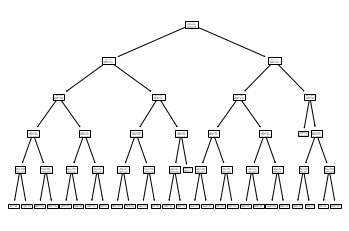

In [40]:
tree.plot_tree(clf)

In [41]:
y_pred=clf.predict(x_test)

In [42]:
metrics.confusion_matrix(y_test,y_pred)

array([[15862,  2575],
       [ 1268, 15036]], dtype=int64)

In [43]:
metrics.accuracy_score(y_test, y_pred)

0.8893814225266976

In [44]:
metrics.precision_score(y_test, y_pred)

0.8537845664641417

In [45]:
metrics.recall_score(y_test, y_pred)

0.9222276741903828

Accuracy, precision and recall all look good.

# Part 4 Combine Rules with Decision Tree Model

Most of time, we will combine rules with models

In [46]:
df_test=pd.concat([y_test,x_test],axis=1)
df_test['pred']=y_pred
df_test

,isApproval,FICOScore,RequestedAmount,InquiryNum,BaseRatingBin,channelBin,pred
1948,0,583.0,2500.0,0.0,8.0,1,0
19522,1,766.0,12000.0,3.0,2.0,8,1
62699,1,730.0,2000.0,3.0,3.0,4,1
6702,1,627.0,18000.0,0.0,6.0,1,0
47061,1,684.0,7000.0,0.0,5.0,1,1
...,...,...,...,...,...,...,...
2954,0,602.0,19000.0,1.0,7.0,1,0
76799,0,793.0,30000.0,0.0,1.0,8,1
76306,1,705.0,15000.0,0.0,4.0,1,1
30583,1,666.0,40000.0,3.0,5.0,6,1


In [47]:
df_test['Aprv_Decision']=np.where(df_test['FICOScore']>=670,1,0)
df_test['Aprv_Decision']=np.where(df_test['InquiryNum']<=2,df_test['Aprv_Decision'],0)
df_test['Aprv_Decision']=np.where(df_test['BaseRatingBin']<=6,df_test['Aprv_Decision'],0)
df_test['Aprv_Decision']=np.where(df_test['pred']==1,1,df_test['Aprv_Decision'])

In [48]:
df_test

,isApproval,FICOScore,RequestedAmount,InquiryNum,BaseRatingBin,channelBin,pred,Aprv_Decision
1948,0,583.0,2500.0,0.0,8.0,1,0,0
19522,1,766.0,12000.0,3.0,2.0,8,1,1
62699,1,730.0,2000.0,3.0,3.0,4,1,1
6702,1,627.0,18000.0,0.0,6.0,1,0,0
47061,1,684.0,7000.0,0.0,5.0,1,1,1
...,...,...,...,...,...,...,...,...
2954,0,602.0,19000.0,1.0,7.0,1,0,0
76799,0,793.0,30000.0,0.0,1.0,8,1,1
76306,1,705.0,15000.0,0.0,4.0,1,1,1
30583,1,666.0,40000.0,3.0,5.0,6,1,1


In [49]:
tn, fp, fn, tp = metrics.confusion_matrix(df_test['isApproval'], df_test['Aprv_Decision']).ravel()
(tn, fp, fn, tp)

(15742, 2695, 1159, 15145)

In [50]:
accuracy=(tp+tn)/len(df_test)
accuracy

0.8890647937595348

In [51]:
precision=tp/(tp+fp)
precision

0.8489349775784754

In [52]:
recall=tp/(tp+fn)
recall

0.9289131501472031

If there is more data,this combined method can work better, because it overcomes the overfitting problem in machine learning models and the underfitting problem in traditional rules.And again, the ruleset should include much more rules instead of just 1 or 2 rules.